In [29]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [98]:
VERBOSE_DEBUG = True

def print_info(waveform):
    # audio data     
    if VERBOSE_DEBUG:
        print("waveform:", waveform.shape, waveform.dtype, type(waveform))
        print(waveform[:5])

def show_audio(wavfile_name):
    # get audio data 
    rate, waveform0 = wavfile.read(wavfile_name)
    
    print_info(waveform0)

    # if stereo, pick the left channel
    waveform = None
    if len(waveform0.shape) == 2:
        print("Stereo detected. Picking one channel.")
        waveform = waveform0.T[1]
    else: 
        waveform = waveform0 
        
    # normalise audio
    wabs = np.abs(waveform)
    wmax = np.max(wabs)
    waveform = waveform / wmax
    
    display.display(display.Audio(waveform, rate = 16000))
    
    print("signal max: %f RMS: %f abs: %f " % (np.max(waveform), 
                                               np.sqrt(np.mean(waveform**2)), 
                                               np.mean(np.abs(waveform))))
    
    
    max_index = np.argmax(waveform)
    print("max_index = ", max_index)
    
    
    fig, axes = plt.subplots(4, figsize=(10, 8))
    
    timescale = np.arange(waveform0.shape[0])
    axes[0].plot(timescale, waveform0)
    
    timescale = np.arange(waveform.shape[0])
    axes[1].plot(timescale, waveform)
   
    # scale and center
    waveform = 2.0*(waveform - np.min(waveform))/np.ptp(waveform) - 1
    
    timescale = np.arange(waveform.shape[0])
    axes[2].plot(timescale, waveform)
    
    
    timescale = np.arange(16000)
    start_index = max(0, max_index-8000)
    end_index = min(max_index+8000, waveform.shape[0])
    axes[3].plot(timescale, waveform[start_index:end_index])
   
    plt.show()


waveform: (45056, 2) int32 <class 'numpy.ndarray'>
[[         0 -122814464]
 [         0 -122912768]
 [         0 -122961920]
 [         0 -122929152]
 [         0 -122896384]]
Stereo detected. Picking one channel.


signal max: -0.356185 RMS: 0.764003 abs: 0.763590 
max_index =  20637


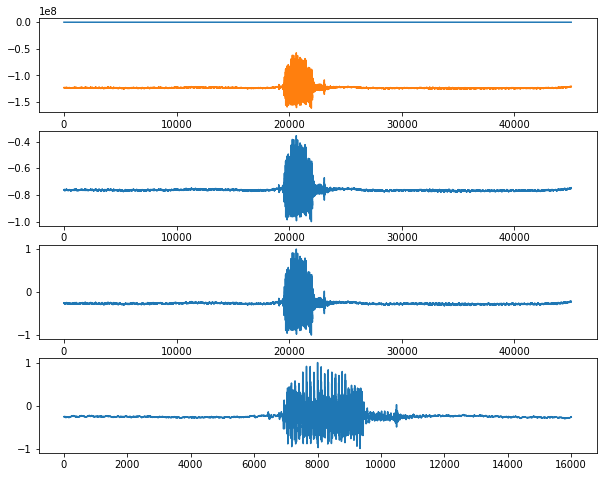

In [100]:
show_audio('test4.wav')